<a href="https://colab.research.google.com/github/kennydukor/Coding-Practice/blob/master/Data_Structure_and_Algorithims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dynamic Programming

In [1]:
import time

##Fibonacci

####Fibonacci: Naive Recursive Approach (Approach 1)

In [ ]:
def fib_1(n):
  if n<=2:
    result = 1
  else:
    result = fib_1(n-1) + fib_1(n-2)
  return result

In [ ]:
start_time = time.time()
print(fib_1(40))
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 22.91421127319336 seconds ---


####Fibonacci: Memoized Solution (Approach 2)

In [ ]:
def fib_2(n, memo={}):
  if n in memo.keys():
    return memo[n]
  if n<=2:
    result = 1
  else:
    result = fib_2(n-1, memo) + fib_2(n-2, memo)
    memo[n] = result
  return result

In [ ]:
start_time = time.time()
n = 1000
print(fib_2(n))
print("--- %s seconds ---" % (time.time() - start_time))

43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875
--- 0.0038640499114990234 seconds ---


####Fibonacci: Bottom-Up Approach

In [ ]:
def fib_bottom_up(n):
  if n<=2:
    return 1
  dyn_array = [None]* (n+1)
  dyn_array[1] = 1
  dyn_array[2] = 1

  for i in range(3, n+1):
    dyn_array[i] = dyn_array[i-1] + dyn_array[i-2]
  return dyn_array[n]

In [ ]:
start_time = time.time()
n = 1000
print(fib_bottom_up(n))
print("--- %s seconds ---" % (time.time() - start_time))

43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875
--- 0.002488851547241211 seconds ---


##Grid Traveler

Say that you are a traveler on a 2D grid. You begin in the top-left corner and your goal is to travel to the bottom-right corner. You may only move down or right.

In how many way can you travel to the goal on a grid with dimensions `m * n`

Write a function `gridTravler(m, n)` to implement this


adapted from: [Coderbyte](https://coderbyte.com/)

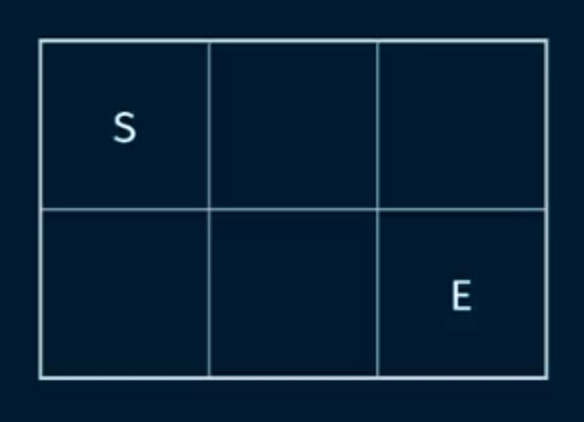

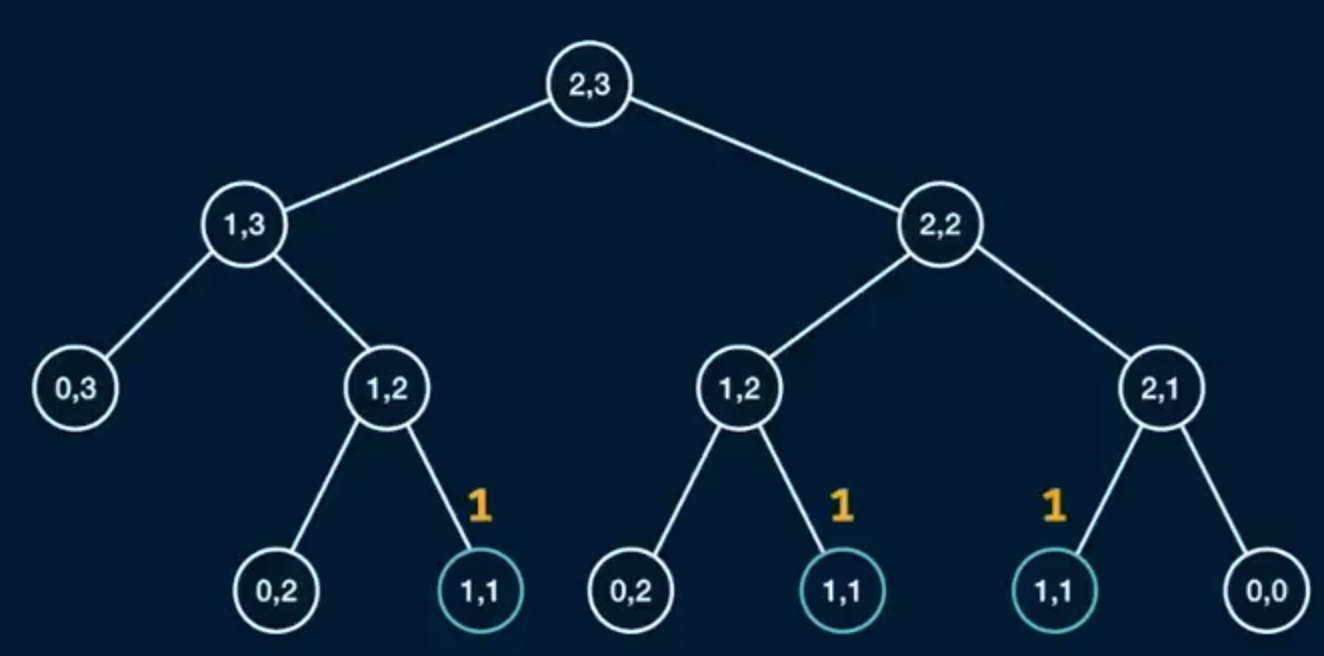

####Grid Traveler: Brute Force Recursion

Notice that the dimension changes for each down or right movement the agent makes.

e.g, For a `2 * 3` grid, if the agents starts at position (1, 1) and moves right, the grid size with valid movement shrinks to `2 * 2`

In [ ]:
def gridTraveler(m, n):
  if m == 0 or n == 0:
    return 0
  if m == 1 and n == 1:
    return 1
  return gridTraveler(m-1, n) + gridTraveler(m, n-1)

In [ ]:
start_time = time.time()
print(gridTraveler(10,10))
print("--- %s seconds ---" % (time.time() - start_time))

48620
--- 0.04774284362792969 seconds ---


####Grid Traveler: Memoization

In [ ]:
def gridTraveler_memo(m, n, memo = {}):
  if m == 0 or n == 0:
    return 0
  if m == 1 and n == 1:
    return 1
  if (m, n) in memo:
    return memo[m, n]
  result = gridTraveler_memo(m-1, n, memo) + gridTraveler_memo(m, n-1, memo)
  memo[m, n] = result
  return result

In [ ]:
start_time = time.time()
print(gridTraveler_memo(18,18))
print("--- %s seconds ---" % (time.time() - start_time))

2333606220
--- 0.0014083385467529297 seconds ---


##Memoization Recipe (Alvin)

Step 1: Make it work
- Visualize the problem as a tree
- Implement the tree using recursion (Brute Force Solution)
- Test it (ie, it should give valid solution)

Step 2: Make it efficient
- Add a memo object (it should be share across the recursive calls)
- Add a base case to return memo values
- Store return value in memo

##canSum

Write a function `canSum(targetSum, numbers)` that takes in a targetSum and an array of numbers as arguments.

The function should return a boolean indicating whether or not it is possible to generate the targetSum using numbers from the array.

You may use an element of the array as many times as needed.

You may assume that all input numbers are nonnegative

####canSum: Brute Force

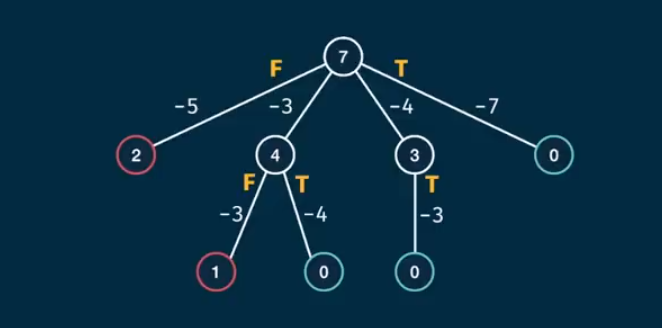

For image above: targetSum = 7 and numbers = [5, 3, 4, 7]

**Return Possible Number of SUM**

In [82]:
# This will give the number of possible SUM
def canSum(targetSum, numbers):
  leastNum = min(numbers)
  if targetSum == 0:
    return True
  if targetSum < leastNum:
    return False
  newTargetSum = 0
  for i in range(len(numbers)):
    newTargetSum += canSum(targetSum - numbers[i], numbers)
  return newTargetSum

In [83]:
start_time = time.time()
print(canSum(7,[5, 3, 4, 7]))
print("--- %s seconds ---" % (time.time() - start_time))

3
--- 0.0005502700805664062 seconds ---


**Return Boolean of True if SUM is possible: APPROACH 1**

In [84]:
# APPRAOCH 1: This will tell if a SUM exists
def canSum_bool_1(targetSum, numbers):
  leastNum = min(numbers)
  if targetSum == 0:
    return True
  if targetSum < leastNum:
    return False
  newTargetSum = 0
  for i in range(len(numbers)):
    newTargetSum += canSum_bool_1(targetSum - numbers[i], numbers)
  return bool(newTargetSum)

In [85]:
start_time = time.time()
print(canSum_bool_1(7,[5, 3, 4, 7]))
print("--- %s seconds ---" % (time.time() - start_time))

True
--- 0.0006253719329833984 seconds ---


**Return Boolean of True if SUM is possible: APPROACH 2**

In [86]:
# APPRAOCH 2: This will tell if a SUM exists
def canSum_bool_2(targetSum, numbers):
  leastNum = min(numbers)
  if targetSum == 0:
    return True
  if targetSum < leastNum:
    return False
  for i in range(len(numbers)):
    if canSum_bool_2(targetSum - numbers[i], numbers) == True:
      return True
  return False

In [87]:
start_time = time.time()
print(canSum_bool_2(7,[5, 3, 4, 7]))
print("--- %s seconds ---" % (time.time() - start_time))

True
--- 0.0014030933380126953 seconds ---


####canSum: Memoized

**Return Boolean of True if SUM is possible: APPROACH 1**

In [88]:
# APPROACH 1: This will tell if a SUM exists
def canSum_bool_memo_1(targetSum, numbers, memo = {}):
  leastNum = min(numbers)
  if targetSum == 0:
    return True
  if targetSum < leastNum:
    return False
  if targetSum in memo.keys():
    return memo[targetSum]
  newTargetSum = 0
  for i in range(len(numbers)):
    newTargetSum += canSum_bool_memo_1(targetSum - numbers[i], numbers, memo)
    memo[targetSum] = newTargetSum
  return bool(newTargetSum)

In [89]:
start_time = time.time()
print(canSum_bool_memo_1(300,[7, 14]))
print("--- %s seconds ---" % (time.time() - start_time))

False
--- 0.0012826919555664062 seconds ---


**Return Boolean of True if SUM is possible: APPROACH 2**

In [90]:
# APPROACH 2: This will tell if a SUM exists
def canSum_bool_memo_2(targetSum, numbers, memo = {}):
  leastNum = min(numbers)
  if targetSum == 0:
    return True
  if targetSum < leastNum:
    return False
  if targetSum in memo.keys():
    return memo[targetSum]
  newTargetSum = 0
  for i in range(len(numbers)):
      if canSum_bool_memo_1(targetSum - numbers[i], numbers, memo) == True:
        memo[targetSum] = True
        return memo[targetSum]
  return False

In [91]:
start_time = time.time()
print(canSum_bool_memo_2(300,[7, 14]))
print("--- %s seconds ---" % (time.time() - start_time))

False
--- 0.0002300739288330078 seconds ---


##howSum

Write a function `howSum(targetSum, numbers)' that takes in a targetSum and an array of numbers as arguments.

The function should return an array containing any combination of elements that add up to exactly the targetSum. If there is no combination that adds up to the targetSum, then return null.

If there are multiple combinations possible, you may return any single one

####canSum: Brute Force

In [4]:
def howSum(targetSum, numbers):
  leastNum = min(numbers)
  if targetSum == 0:
    return []
  if targetSum < leastNum:
    return None
  
  for i in range(len(numbers)):
    sumComb = howSum(targetSum - numbers[i], numbers)
    if sumComb != None:
      sumComb.append(numbers[i])
      return sumComb
  return None

In [5]:
start_time = time.time()
print(howSum(7, [5, 3, 4, 7]))
print("--- %s seconds ---" % (time.time() - start_time))

[4, 3]
--- 0.0005388259887695312 seconds ---


####canSum: Memoized

In [6]:
def howSum_memoized(targetSum, numbers, memo = {}):
  leastNum = min(numbers)
  if targetSum == 0:
    return []
  if targetSum < leastNum:
    return None
  if targetSum in memo.keys():
    return memo[targetSum]
  
  for i in range(len(numbers)):
    sumComb = howSum_memoized(targetSum - numbers[i], numbers, memo)
    memo[targetSum] = sumComb
    if sumComb != None:
      sumComb.append(numbers[i])
      return sumComb
  return None

In [7]:
start_time = time.time()
print(howSum_memoized(300, [7, 14]))
print("--- %s seconds ---" % (time.time() - start_time))

None
--- 0.00043201446533203125 seconds ---


##bestSum
Write a function `bestSum(targetSum, numbers)' that takes in a targetSum and an array of numbers as arguments.

The function should return an array containing the **shortest** combination of numbers that add up to exactly the targetSum. 

If there is a tie for the shortest combination, you may return one of the shortest.

####bestSum: Brute Force

In [18]:
def bestSum(targetSum, numbers):
  leastNum = min(numbers)
  if targetSum == 0:
    return []
  if targetSum < leastNum:
    return None
  
  shortestComb = None

  for i in range(len(numbers)):
    sumComb = bestSum(targetSum - numbers[i], numbers)
    if sumComb != None:
      sumComb.append(numbers[i])
      if shortestComb == None or len(sumComb) < len(shortestComb):
        shortestComb = sumComb

  return shortestComb

In [19]:
start_time = time.time()
print(bestSum(7, [5, 3, 4, 7]))
print("--- %s seconds ---" % (time.time() - start_time))

[7]
--- 0.00019431114196777344 seconds ---


bestSum: Memoized

{(2, 3): 'stan'}


In [ ]:
if not A: return 0
    # For all left end of interval, store the largest right end
    n = len(A)
    aux = list(range(n + 1))
    for i, x in enumerate(A, 1):
        aux[max(i - x, 1)] = min(i + x, n)

    ans, l, r = 0, 1, aux[1]
    while r <= n:
        new_r, ans = r, ans + 1
        # If the fountain ranges overlap
        # get the rightmost bound for next search
        while l <= r:
            new_r = max(new_r, aux[l])
            l += 1
        if l > n: break
        # If the fount

        r = max(new_r, aux[l])
    return ans 

In [ ]:
extents = [0]*len(locations)
    n = len(locations)

In [ ]:
def knapsack(vals, weights, capacity):
    sack = [[0 for i in range(capacity+1)] for j in range(len(weights)+1)]
    
    for i in range(1, len(weights)+ 1):
        for j in range(1, capacity+1):
            if i==0 or j ==0:
                sack[i][j] = 0
            elif (weights[i - 1] <= j):
                sack[i][j] = max(vals[i - 1] + sack[i-1][j - weights[i-1]], sack[i-1][j])
            else:
                sack[i][j] = sack[i - 1][j]
    return sack[len(weights)][capacity]

def selectStock(saving, currentValue, futureValue, index = 0, profit = 0):
    values = [0 for x in range(len(currentValue))]
    
    for i in range(len(currentValue)):
        actualValue = futureValue[i] - currentValue[i]
        if actualValue < 0:
            actualValue = 0
        values[i] = actualValue
    return knapsack(values, currentValue, saving)